# Emotion Detection Music Player

	Emotion player is an music player which plays song according to the emotion of the user. It aims to provide user preferred music with emotion awareness.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
import numpy
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Base csv file
df = pd.read_csv('C:\\Users\\ajayp\\Desktop\\project\\fer2013.csv')  

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


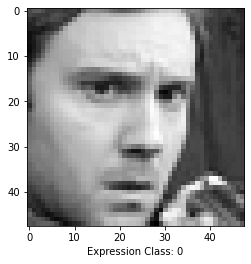

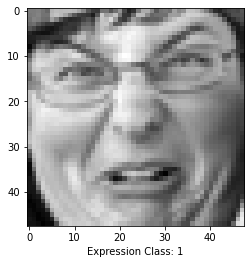

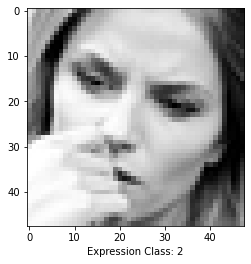

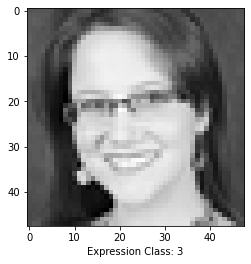

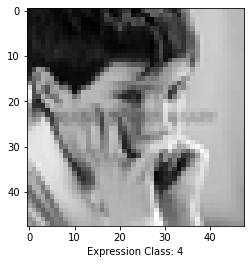

In [4]:
# since the pixels are in a single long presentation this function will turn it to a matrix of 48x48
def makemtrx(lst, n=48):
    for i in range(0, 48*48, n):  
        yield lst[i:i + n] 

# This function will help to show the images
def showimg(data):
    pixel = [int(i) for i in data[1].split(' ')]
    pixel = np.array(list(makemtrx(pixel)))
    plt.imshow(pixel, cmap='gray')
    plt.xlabel(f'Expression Class: {data[0]}')
    plt.plot()

for i in range(5):
    plt.figure()
    showimg(df[df.emotion == i].values[0])

In [5]:
print('Total lenth of dataset: ', len(df.Usage), '\n') # Which is actually also the lenth of total dataframe
print('Total Categories we have: ', df.Usage.unique())
print('Number of data in each category: ', '{ Training: ', len(df[df.Usage == 'Training']), ' PublicTest: ', len(df[df.Usage == 'PublicTest']), ' PrivateTest: ', len(df[df.Usage == 'PrivateTest']), '}\n')
print('Total Expression Classes we have: ', df.emotion.unique(), '\n')
print('Type of the pixel data is: ', type(df.pixels[0]))

Total lenth of dataset:  35887 

Total Categories we have:  ['Training' 'PublicTest' 'PrivateTest']
Number of data in each category:  { Training:  28709  PublicTest:  3589  PrivateTest:  3589 }

Total Expression Classes we have:  [0 2 4 6 3 5 1] 

Type of the pixel data is:  <class 'str'>


* We are using 28709 images of training set to train the model

# Data preparation

In [6]:
DataDirectory="C:\\Users\\ajayp\\Desktop\\project\\Training\\"

In [7]:
#CLASS LABEL FOR EMOTIONS
# ANGRY-0
# DISGUST-1
# FEAR-2
# HAPPY-3
# NEUTRAL-4
# SAD-5
# SURPRISE-6
classes=["0","1","2","3","4","5","6"]

In [8]:
img_size=224
#MAKING ALL IMAGE SIZE 224 pixels

This create_training_Data() function will convert all these images into dataframe

In [9]:
training_Data = []
def create_training_Data():
    for category in classes:
        path = os.path.join(DataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

28709


This random shuffle shuffles all the images of dataset to make predictions more accurate

In [12]:
import random
random.shuffle(training_Data)

* Seperate x and y i.e, dependent and independent variables

In [13]:
x=[]
y=[]
for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3)

KeyboardInterrupt: 

In [ ]:
y=np.array(y)

# Model Building
This code is used to craete emotion detection model using with the help of transfer learning.We use MobileNet-v2 model for initial training and after that we add layers at the last of this to predict our problem.

MobileNet-v2 is a convolutional neural network that is 53 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. 

model=tf.keras.applications.MobileNetV2()

base_input=model.layers[0].input

base_output=model.layers[-2].output

final_output=layers.Dense(128)(base_output)

final_output=layers.Activation('relu')(final_output)

final_output=layers.Dense(64)(final_output)

final_output=layers.Activation('relu')(final_output)

final_output=layers.Dense(7,activation='softmax')(final_output)

new_model=keras.Model(inputs=base_input,outputs=final_output)

new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

new_model.fit(x,y,epochs=10)

* We arleady trained this model 10 times and save the values in 'my_model1.h5' file.So we just need to load this file for predictions

In [ ]:
temp=tf.keras.models.load_model('my_model1.h5')

Now this temp model is used for emotion prediction.

In [ ]:
# To capture video from webcam. 
cap = cv2.VideoCapture(1)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
while True:
    # Read the frame
    ret, img = cap.read()

    # Convert to grayscale
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        rol_gray = gray[y:y+h, x:x+w]
        rol_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  #BGR
        facess = face_cascade.detectMultiScale(rol_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in facess:
                face_rol = rol_color[ey: ey+eh, ex: ex+ew]
        
    final_image=cv2.resize(face_rol,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    font=cv2.FONT_HERSHEY_SIMPLEX
    pred=temp.predict(final_image)
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    if(np.argmax(pred)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(pred)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(pred)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(pred)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(pred)==4):
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        #playsound("C:\\Users\\ajayp\\Downloads\\Music\\m.mp3")
    elif(np.argmax(pred)==5):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))

    cv2.imshow("Face emotion recognization",img)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
    
# Release the VideoCapture object

cap.release()
cap.destroyAllWindows()